# Unit 3 Supervised Learning Capstone

This capstone project is fosused on prediction of the precense of heart disease in individuals using data obtained from traditional diagnostic tests. The data is provided by the Cleveland Clinic Database. The data was provided by [Kaggel](https://www.kaggle.com/) the HEART DISEASE webpage is at this link  [HD_Dataset](https://www.kaggle.com/ronitf/heart-disease-uci).

#### Data Overview
The original data set contained personal information and more features than is provide to the public. There were originally 76 attributes measured in the original data. The data has been scrubbed of personal identifiers and the attributes reduced to 14. Of the 14 attributes there are both catigorical and continous varibles. The target feature is binary to indicate either the precence or abcense of heart disease.

In [2]:
import pandas as pd

import mlflow
from mlflow import sklearn as mlflow_sklearn

import sklearn.datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
import catboost
import lightgbm 
import xgboost

In [3]:
import numpy as np
import six
from collections import defaultdict
from scipy import sparse

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.externals.joblib import Parallel, delayed
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline, FeatureUnion, _fit_transform_one, _transform_one

import category_encoders as ce

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data
### Data Set Exploration

In [56]:
# Read in data and look at first rows
df = pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
# General stats on data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# Target bias
print('Target Bias')
target_sum = df['target'].count()
target_count = df['target'].value_counts()
percent_pos = round(target_count[0] / target_sum *100,1)
percent_neg = 100 - percent_pos
print('Total number targets is {}, individuals with heart disease present is {}% positve and {}% negitive'.
      format(target_sum,str(percent_pos), str(percent_neg) ))


Target Bias
Total number targets is 303, individuals with heart disease present is 45.5% positve and 54.5% negitive


In [13]:
# Gender bias
print('Gender Bias')
gender_sum = df['sex'].count()
gender_count = df['sex'].value_counts()
percent_male = round(gender_count[1] / gender_sum *100,1)
percent_female = round(100 - percent_male,1)
print('Of the {} participents, {}% are Male and {}% are Female'.
      format(gender_sum,str(percent_male), str(percent_female) ))

Gender Bias
Of the 303 participents, 68.3% are Male and 31.7% are Female


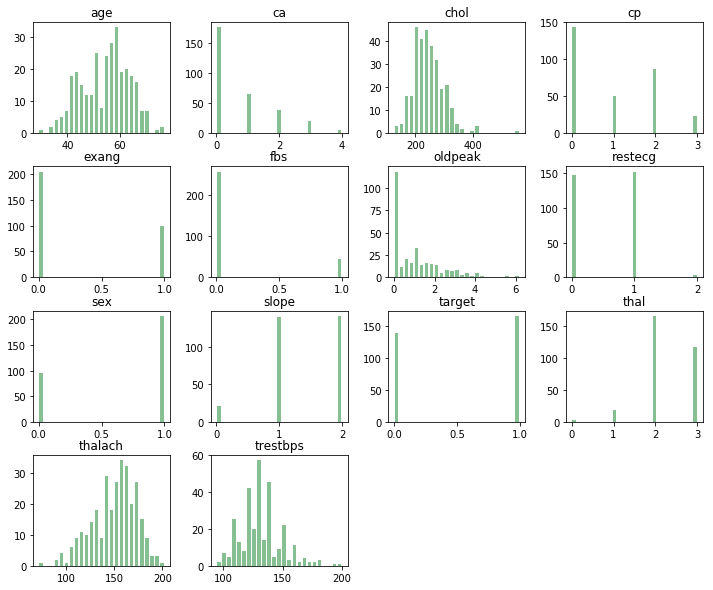

In [14]:
# Examine data for type, shape
df.hist(bins=25, grid=False, figsize=(12,10), color='#86bf91', zorder=2, rwidth=0.7)
plt.show()

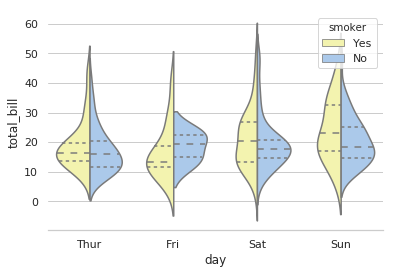

In [43]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="smoker",
               split=True, inner="quart",
               palette={"Yes": "y", "No": "b"},
               data=tips)
sns.despine(left=True)

In [44]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [47]:
df_age = df[[ 'sex', 'age']]
df_age.head()

,sex,age
0,1,63
1,1,37
2,0,41
3,1,56
4,0,57


In [54]:
# Continous data plots
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# continuous data
cont_lables = ['sex', 'age',  'trestbps', 'chol', 'thalach' ]

df_cont = pd.DataFrame(df, columns=cont_lables)
df_age = df[[ 'sex', 'age']]

# Draw a nested violinplot and split the violins for easier comparison

df = pd.melt(df, value_vars=['age'], id_vars='sex')
sns.violinplot(x='age', y='years', hue='sex', data=df)
plt.show()
sns.despine(left=True)

ValueError: Could not interpret input 'age'

In [6]:

# Reorder columns to group varibles by type [continous, catagorical, binary]
cols = list(df.columns.values)
new_index = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'cp',  'restecg', 'slope', 'ca', 'thal', 'exang', 'fbs', 'sex', 'target']
df = df.reindex(columns=new_index)
df.head(3)

,age,trestbps,chol,thalach,oldpeak,cp,restecg,slope,ca,thal,exang,fbs,sex,target
0,63,145,233,150,2.3,3,0,0,0,1,0,1,1,1
1,37,130,250,187,3.5,2,1,0,0,2,0,0,1,1
2,41,130,204,172,1.4,1,0,2,0,2,0,0,0,1


In [ ]:
# category_index = [ 'cp',  'restecg', 'slope', 'ca', 'thal']
# df[category_index] = df[category_index].astype('category')

# df.dtypes

     count       mean       std   min    25%   50%   75%   max
sex                                                           
0     96.0  55.677083  9.409396  34.0  49.75  57.0  63.0  76.0
1    207.0  53.758454  8.883803  29.0  47.00  54.0  59.5  77.0


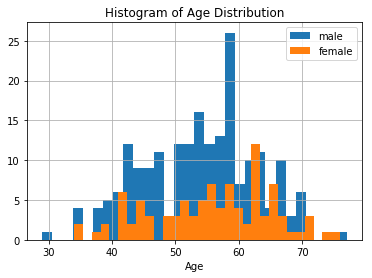

In [7]:

age_female = df.age[df['sex']==0]
age_male = df.age[df['sex']==1]
df_age = df.copy()
df_age = df_age.groupby('sex')
print(df_age['age'].describe())
# Plot Data
age_male.hist(bins=30)
age_female.hist(bins=30)
plt.title('Histogram of Age Distribution')
plt.legend(['male','female'])
plt.xlabel('Age')
plt.show()

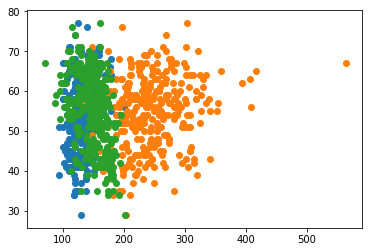

In [8]:
plt.scatter(df.trestbps,  df.age)
plt.scatter(df.chol,  df.age)
plt.scatter(df.thalach,  df.age)


In [16]:
class PandasFeatureUnion(FeatureUnion):
    def fit_transform(self, X, y=None, **fit_params):
        self._validate_transformers()
        result = Parallel(n_jobs=self.n_jobs)(
            delayed(_fit_transform_one)(trans, X, y, weight,
                                        **fit_params)
            for name, trans, weight in self._iter())

        if not result:
            # All transformers are None
            return np.zeros((X.shape[0], 0))
        Xs, transformers = zip(*result)
        self._update_transformer_list(transformers)
        if any(sparse.issparse(f) for f in Xs):
            Xs = sparse.hstack(Xs).tocsr()
        else:
            Xs = self.merge_dataframes_by_column(Xs)
        return Xs

    def merge_dataframes_by_column(self, Xs):
        return pd.concat(Xs, axis="columns", copy=False)

    def transform(self, X):
        Xs = Parallel(n_jobs=self.n_jobs)(
            delayed(_transform_one)(trans, X, None, weight)
            for name, trans, weight in self._iter())
        if not Xs:
            # All transformers are None
            return np.zeros((X.shape[0], 0))
        if any(sparse.issparse(f) for f in Xs):
            Xs = sparse.hstack(Xs).tocsr()
        else:
            Xs = self.merge_dataframes_by_column(Xs)
        return Xs

In [17]:
def _name_estimators(estimators):
    """Generate names for estimators."""

    names = [type(estimator).__name__.lower() for estimator in estimators]
    namecount = defaultdict(int)
    for est, name in zip(estimators, names):
        namecount[name] += 1

    for k, v in list(six.iteritems(namecount)):
        if v == 1:
            del namecount[k]

    for i in reversed(range(len(estimators))):
        name = names[i]
        if name in namecount:
            names[i] += "-%d" % namecount[name]
            namecount[name] -= 1

    return list(zip(names, estimators))

In [18]:
def make_pandas_union(*transformers, **kwargs):
    n_jobs = kwargs.pop('n_jobs', None)
    if kwargs:
        raise TypeError('Unknown keyword arguments: "{}"'
                        .format(list(kwargs.keys())[0]))
    return PandasFeatureUnion(_name_estimators(transformers), n_jobs=n_jobs)

In [19]:
class OrdinalEncoderPandas(TransformerMixin, BaseEstimator):
    def __init__(self, columns):
        self.columns = columns
        self.transformers = {}
    
    def fit(self, X, y=None):
        for column in self.columns:
            self.transformers[column] = ce.OrdinalEncoder(return_df=False, handle_unknown="impute").fit(X[[column]])
        return self
    
    def transform(self, X, y=None):
        X = X.drop(list(set(X.columns) - set(self.columns)), axis=1)
        for column in self.columns:
            X[column] = self.transformers[column].transform(X[[column]])
            X[column] = X[column].apply(lambda x: x if x else -1)
        return X

In [20]:
class OneHotEncoderPandas(TransformerMixin, BaseEstimator):
    def __init__(self, columns):
        self.columns = columns
        self.transformers = {}
        self.feature_names = {}
        self.feature_names_all = []

    def fit(self, X, y=None):
        for column in self.columns:
            self.transformers[column] = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(X[[column]])
            features = [f"{column}_{i}" for i in self.transformers[column].get_feature_names()]
            self.feature_names[column] = features
            for feature in features:
                self.feature_names_all.append(feature)
        return self

    def transform(self, X, y=None):
        ohe_df_list = []
        for column in self.columns:
            ohe_df = pd.DataFrame(self.transformers[column].transform(X[[column]]))
            feature_names = [f"{column}_{i}" for i in self.transformers[column].get_feature_names()]
            ohe_df.columns = self.feature_names[column]
            ohe_df_list.append(ohe_df)
        ohe_df_concat = pd.concat(ohe_df_list, axis=1)
        return ohe_df_concat

In [21]:
class DropColumn(TransformerMixin, BaseEstimator):
    def __init__(self, columns, no_drops):
        self.columns = columns
        self.no_drops = no_drops

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        for column in self.columns:
            if column in X.columns:
                drop_together = False
                if self.no_drops:
                    for no_drop in self.no_drops:
                        if column == no_drop and self.no_drops[no_drop] not in X.columns:
                            drop_together = True
                if not drop_together:
                    X = X.drop(columns=column)
            else:
                print(f"Drop Warning: Column {column} not in X")
        return X

In [22]:
class ChangeColumnType(TransformerMixin, BaseEstimator):
    def __init__(self, types):
        self.types = types

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        for column in self.types.keys():
            if column in X.columns:
                X[column] = X[column].astype(self.types[column])
            else:
                print(f"Change Warning: Column {column} not in X")
        return X

## Notes:
- XGBoost/Random Forest requires OHE of categorical variables unless categorial variable is ordinal
- XGBoost/LightGBM/Catboost supports missing variables, but RandomForests do not (most models in sklearn does not support missing values)

### Features 5 to 9 (4 feature in total) categorical type (non-binary)

In [27]:
df_samples = df.copy()


In [28]:
categorical_features = list(df_samples.columns[5:9])
target = "target"

In [25]:
# for i in categorical_features:
#     df_samples[i] = abs(df_samples[i]).astype(int).astype(str)

In [29]:
df_samples.head()

,age,trestbps,chol,thalach,oldpeak,cp,restecg,slope,ca,thal,exang,fbs,sex,target
0,63,145,233,150,2.3,3,0,0,0,1,0,1,1,1
1,37,130,250,187,3.5,2,1,0,0,2,0,0,1,1
2,41,130,204,172,1.4,1,0,2,0,2,0,0,0,1
3,56,120,236,178,0.8,1,1,2,0,2,0,0,1,1
4,57,120,354,163,0.6,0,1,2,0,2,1,0,0,1


### Pipeline for Models that does not support categorical variables

Need to use OHE, only when you know the data is not ordinal, otherwise you can use ordinal encoding

XGBoost, RandomForest (CART can handle categorical, but RF does not have this implemented)

In [31]:
pipe_ohe = make_pipeline(
    make_pandas_union(
        DropColumn(columns=categorical_features, no_drops=None),
        make_pipeline(
            ChangeColumnType(types={i: str for i in categorical_features}),
            OneHotEncoderPandas(columns=categorical_features)
        )
    )
)

In [32]:
pipe_ohe.fit_transform(df_samples).head(5)

,age,trestbps,chol,thalach,oldpeak,thal,exang,fbs,sex,target,...,restecg_x0_1,restecg_x0_2,slope_x0_0,slope_x0_1,slope_x0_2,ca_x0_0,ca_x0_1,ca_x0_2,ca_x0_3,ca_x0_4
0,63,145,233,150,2.3,1,0,1,1,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,37,130,250,187,3.5,2,0,0,1,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,41,130,204,172,1.4,2,0,0,0,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,56,120,236,178,0.8,2,0,0,1,1,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,57,120,354,163,0.6,2,1,0,0,1,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [33]:
ohe_columns = list(set(pipe_ohe.fit_transform(df_samples).columns) - set([target]))

### Pipeline for models that support categorical variables

LightGBM, CatBoost can handle categorical variables

In [34]:
pipe_cat = make_pipeline(
    make_pandas_union(
        DropColumn(columns=categorical_features, no_drops=None),
        OrdinalEncoderPandas(columns=categorical_features)
    ),
    ChangeColumnType(types={i: "category" for i in categorical_features}),
)

In [35]:
pipe_cat.fit_transform(df_samples).head(5)

,age,trestbps,chol,thalach,oldpeak,thal,exang,fbs,sex,target,cp,restecg,slope,ca
0,63,145,233,150,2.3,1,0,1,1,1,1,1,1,1
1,37,130,250,187,3.5,2,0,0,1,1,2,2,1,1
2,41,130,204,172,1.4,2,0,0,0,1,3,1,2,1
3,56,120,236,178,0.8,2,0,0,1,1,3,2,2,1
4,57,120,354,163,0.6,2,1,0,0,1,4,2,2,1


## Training/Testing/Validation

In [38]:
df_samples_ohe = pipe_ohe.fit_transform(df_samples)
train_ohe, test_ohe = train_test_split(df_samples_ohe, test_size=0.2, stratify=df_samples_ohe[target], random_state=0)
train_ohe, valid_ohe = train_test_split(train_ohe, test_size=0.2, stratify=train_ohe[target], random_state=0)

In [39]:
df_samples_cat = pipe_cat.fit_transform(df_samples)
train_cat, test_cat = train_test_split(df_samples_cat, test_size=0.2, stratify=df_samples_cat[target], random_state=0)
train_cat, valid_cat = train_test_split(train_cat, test_size=0.2, stratify=train_cat[target], random_state=0)

### Without ML-Flow

In [40]:
rf_classifier = RandomForestClassifier(
    criterion='entropy',
    max_features=None,
    n_estimators=20,
    max_depth=4,
    random_state=0,
    n_jobs=4)

In [41]:
rf_classifier.fit(X=train_ohe[ohe_columns], y=train_ohe[target])
# Use validation set to modify hyperparameters
print(accuracy_score(valid_ohe[target], rf_classifier.predict(valid_ohe[ohe_columns])))
# Use testing set to evaluate final performance
print(accuracy_score(test_ohe[target], rf_classifier.predict(test_ohe[ohe_columns])))

0.8163265306122449
0.8524590163934426


In [42]:
xgb_classifier = xgboost.XGBClassifier(
    max_depth=4,
    learning_rate=0.008,
    n_estimators=200
)

In [43]:
xgb_classifier.fit(X=train_ohe[ohe_columns], y=train_ohe[target])
# Use validation set to modify hyperparameters
print(accuracy_score(valid_ohe[target], xgb_classifier.predict(valid_ohe[ohe_columns])))
# Use testing set to evaluate final performance
print(accuracy_score(test_ohe[target], xgb_classifier.predict(test_ohe[ohe_columns])))

0.7959183673469388
0.8688524590163934


In [44]:
lgb_classifier = lightgbm.LGBMClassifier(
    objective="binary",
    categorical_features="auto",
    max_depth=4,
    learning_rate=0.01,
    n_estimators=200
)

In [45]:
lgb_classifier.fit(X=train_ohe[ohe_columns], y=train_ohe[target])
# Use validation set to modify hyperparameters
print(accuracy_score(valid_ohe[target], lgb_classifier.predict(valid_ohe[ohe_columns])))
# Use testing set to evaluate final performance
print(accuracy_score(test_ohe[target], lgb_classifier.predict(test_ohe[ohe_columns])))

0.7755102040816326
0.8360655737704918


In [46]:
cat_classifier = catboost.CatBoostClassifier(
    max_depth=4,
    learning_rate=0.01,
    n_estimators=200,
    verbose=0
)

In [47]:
cat_classifier.fit(X=train_ohe[ohe_columns], y=train_ohe[target])
# Use validation set to modify hyperparameters
print(accuracy_score(valid_ohe[target], cat_classifier.predict(valid_ohe[ohe_columns])))
# Use testing set to evaluate final performance
print(accuracy_score(test_ohe[target], cat_classifier.predict(test_ohe[ohe_columns])))

0.8163265306122449
0.8688524590163934


### With ML-Flow

In [48]:
mlflow.set_experiment("Training/Testing/Validation")

In [50]:
with mlflow.start_run(run_name="Random Forest"):
    criterion = "entropy"
    max_features = None
    n_estimators = 20
    max_depth = 4
    
    rf_classifier = RandomForestClassifier(
        criterion=criterion,
        max_features=max_features,
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=0,
        n_jobs=4)
    rf_classifier.fit(X=train_ohe[ohe_columns], y=train_ohe[target])
    
    valid_accuracy = accuracy_score(valid_ohe[target], rf_classifier.predict(valid_ohe[ohe_columns]))
    test_accuracy = accuracy_score(test_ohe[target], rf_classifier.predict(test_ohe[ohe_columns]))
    
    mlflow.log_param("criterion", criterion)
    mlflow.log_param("max_features", max_features)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    
    mlflow.log_metric("valid_accuracy", valid_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)

    mlflow_sklearn.log_model(rf_classifier, "model")

In [51]:
with mlflow.start_run(run_name="XGBoost"):
    n_estimators = 200
    max_depth = 4
    learning_rate = 0.008
    
    xgb_classifier = xgboost.XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators
    )
    xgb_classifier.fit(X=train_ohe[ohe_columns], y=train_ohe[target])
    
    valid_accuracy = accuracy_score(valid_ohe[target], xgb_classifier.predict(valid_ohe[ohe_columns]))
    test_accuracy = accuracy_score(test_ohe[target], xgb_classifier.predict(test_ohe[ohe_columns]))
    
    mlflow.log_param("criterion", criterion)
    mlflow.log_param("max_features", max_features)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    
    mlflow.log_metric("valid_accuracy", valid_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)

    mlflow_sklearn.log_model(xgb_classifier, "model")

In [52]:
with mlflow.start_run(run_name="LightGBM"):
    objective = "binary"
    categorical_features = "auto"
    n_estimators = 200
    max_depth = 4
    learning_rate = 0.01
    
    lgb_classifier = lightgbm.LGBMClassifier(
        objective=objective,
        categorical_features=categorical_features,
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators
    )
    lgb_classifier.fit(X=train_ohe[ohe_columns], y=train_ohe[target])
    
    valid_accuracy = accuracy_score(valid_ohe[target], lgb_classifier.predict(valid_ohe[ohe_columns]))
    test_accuracy = accuracy_score(test_ohe[target], lgb_classifier.predict(test_ohe[ohe_columns]))
    
    mlflow.log_param("criterion", criterion)
    mlflow.log_param("max_features", max_features)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    
    mlflow.log_metric("valid_accuracy", valid_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)

    mlflow_sklearn.log_model(lgb_classifier, "model")

In [53]:
with mlflow.start_run(run_name="CatBoost"):
    n_estimators = 200
    max_depth = 8
    learning_rate = 0.01
    
    cat_classifier = catboost.CatBoostClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        verbose=0
    )
    cat_classifier.fit(X=train_ohe[ohe_columns], y=train_ohe[target])
    
    valid_accuracy = accuracy_score(valid_ohe[target], cat_classifier.predict(valid_ohe[ohe_columns]))
    test_accuracy = accuracy_score(test_ohe[target], cat_classifier.predict(test_ohe[ohe_columns]))
    
    mlflow.log_param("criterion", criterion)
    mlflow.log_param("max_features", max_features)
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("max_depth", max_depth)
    
    mlflow.log_metric("valid_accuracy", valid_accuracy)
    mlflow.log_metric("test_accuracy", test_accuracy)

    mlflow_sklearn.log_model(cat_classifier, "model")

In [ ]:
!mlflow ui --host 0.0.0.0

[2019-04-04 22:19:25 -0400] [27048] [INFO] Starting gunicorn 19.9.0
[2019-04-04 22:19:25 -0400] [27048] [INFO] Listening at: http://0.0.0.0:5000 (27048)
[2019-04-04 22:19:25 -0400] [27048] [INFO] Using worker: sync
[2019-04-04 22:19:25 -0400] [27051] [INFO] Booting worker with pid: 27051


### Using Gridsearch

## Training/Testing/Validation with Early Stopping

### Without ML-Flow

### With ML-Flow

## Training/Testing with CV

### Without ML-Flow

### With ML-Flow

## Training/Testing with CV with Early Stopping

### Without ML-Flow

### With ML-Flow

## Nested CV

### Without ML-Flow

### With ML-Flow

## Nested CV with Early Stopping

### Without ML-Flow

### With ML-Flow